# **Predict Cancer Mortality Rates in US Counties**

The aim of this project was to to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country.The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). 

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [67]:
import os
import pandas as pd
import numpy as np
os.getcwd()
os.chdir('C:/Python/Machine Learning/datasets/COMP5611M_Assessment')

root_dir = 'C:/Python/Machine Learning/' # this is to be defined by you 
local_path = 'datasets/COMP5611M_Assessment/' # store the related data files in this folder

data_dir = root_dir + local_path
#Define paths to the training data and targets files
training_data_path = data_dir + 'Training_data.csv'
training_targets_path = data_dir + 'Training_data_targets.csv'

import warnings # supress warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

Histograms were plotted for all features in the dataset to visualise their distribution. The number of 0'S and NAN's were also calcualated to support this. Correlations between each feature and the target was computed. 

array([[<AxesSubplot:title={'center':'avgAnnCount'}>,
        <AxesSubplot:title={'center':'avgDeathsPerYear'}>,
        <AxesSubplot:title={'center':'incidenceRate'}>,
        <AxesSubplot:title={'center':'medIncome'}>,
        <AxesSubplot:title={'center':'popEst2015'}>,
        <AxesSubplot:title={'center':'povertyPercent'}>],
       [<AxesSubplot:title={'center':'studyPerCap'}>,
        <AxesSubplot:title={'center':'MedianAge'}>,
        <AxesSubplot:title={'center':'MedianAgeMale'}>,
        <AxesSubplot:title={'center':'MedianAgeFemale'}>,
        <AxesSubplot:title={'center':'AvgHouseholdSize'}>,
        <AxesSubplot:title={'center':'PercentMarried'}>],
       [<AxesSubplot:title={'center':'PctNoHS18_24'}>,
        <AxesSubplot:title={'center':'PctHS18_24'}>,
        <AxesSubplot:title={'center':'PctSomeCol18_24'}>,
        <AxesSubplot:title={'center':'PctBachDeg18_24'}>,
        <AxesSubplot:title={'center':'PctHS25_Over'}>,
        <AxesSubplot:title={'center':'PctBachDeg25_O

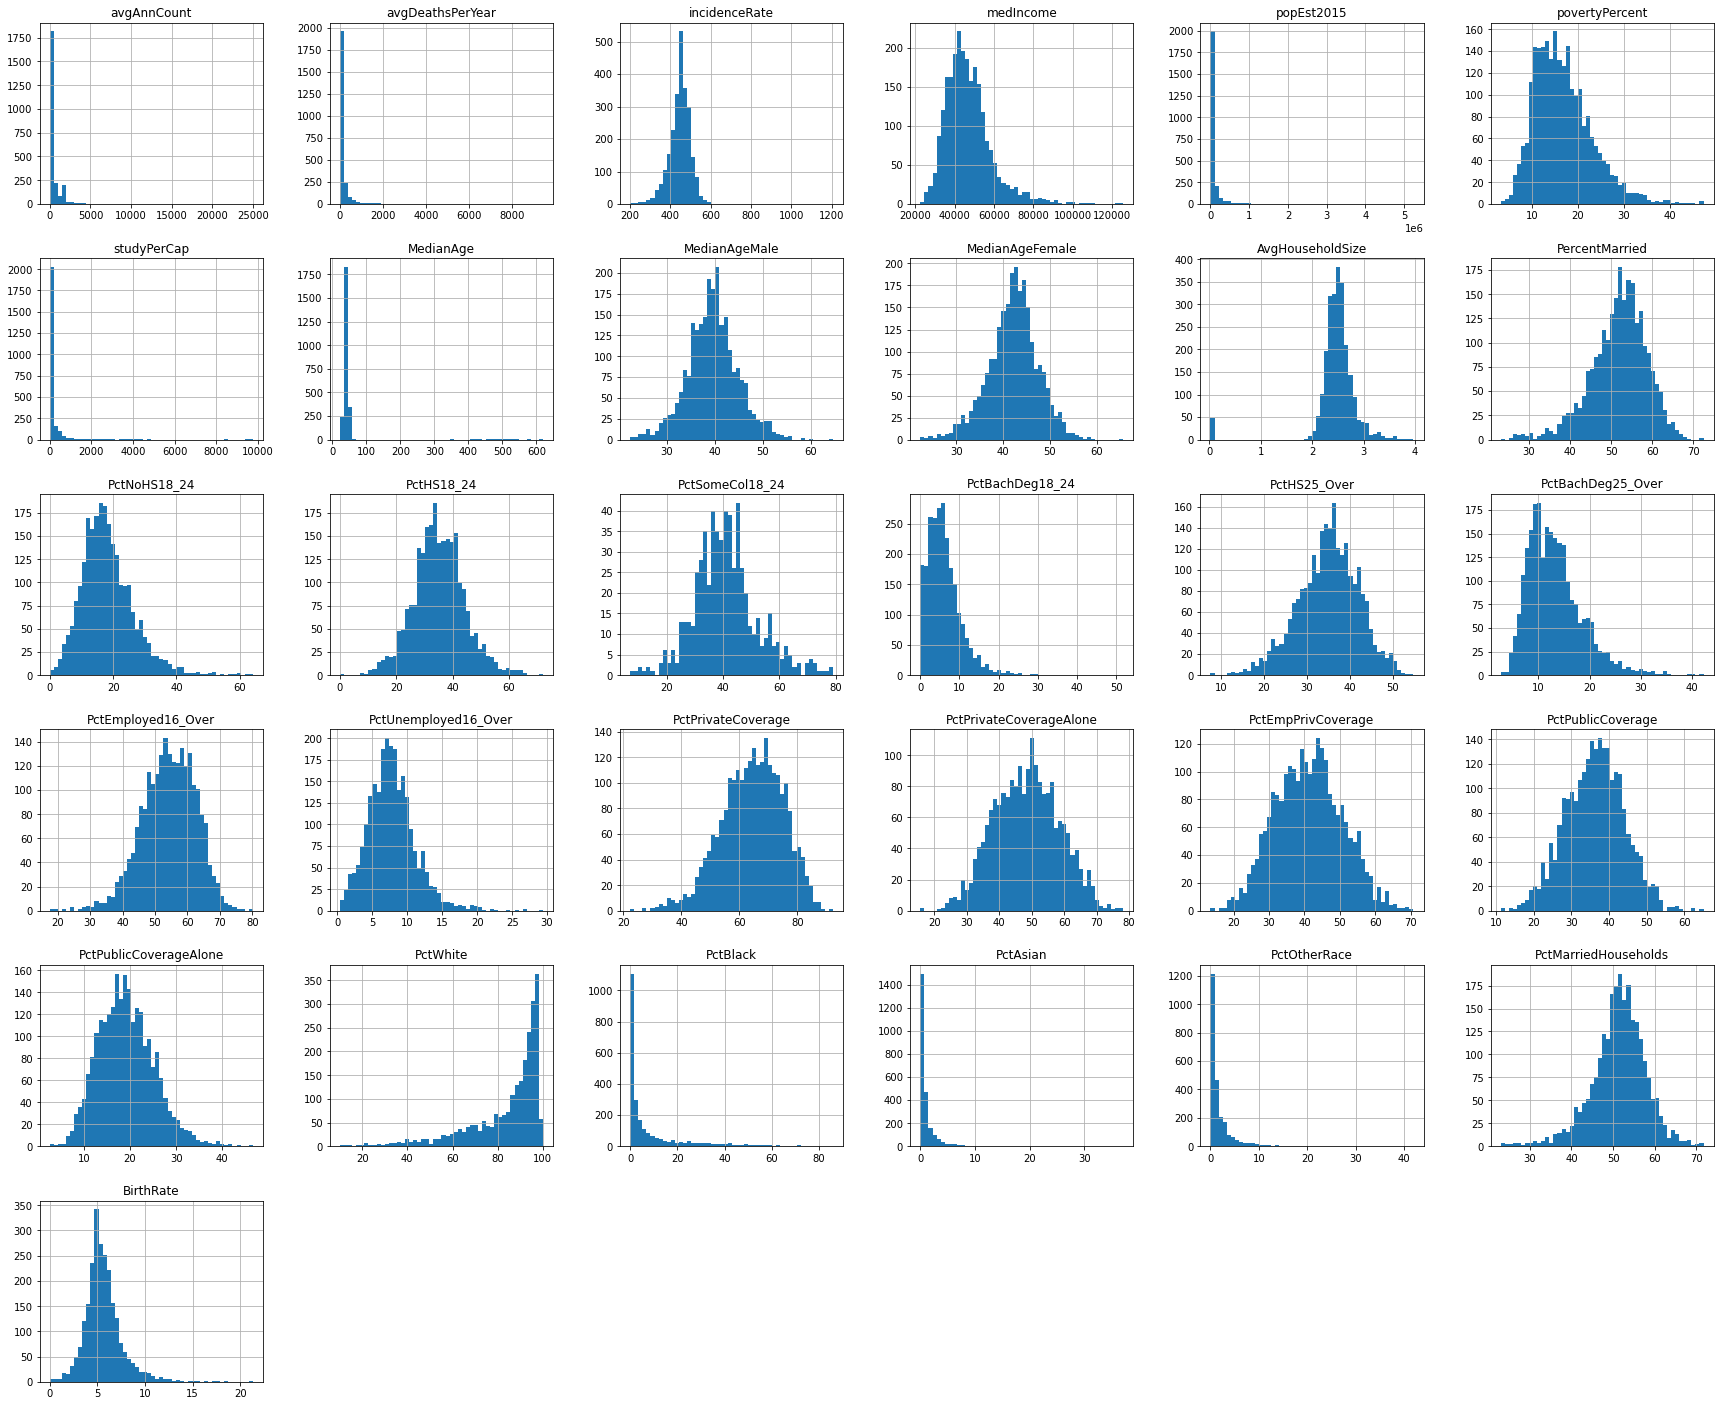

In [68]:
#loads training datasets in
features_2 = pd.read_csv(training_data_path)
features_target = pd.read_csv(training_targets_path)

%matplotlib inline
import matplotlib.pyplot as plt

#histograms for EDA
features_2.hist(bins=50,figsize=(30,25))

In [69]:
#Checks for number of 0's and NaNs for each variable
def Data_Cleaning_Checks():
    print('number of observations:', features_2.shape[0])
    print('')
        
    for column_name in features_2.columns:
        column = features_2[column_name] 
        count = (column == 0).sum()
        print('Count of zeros in column:', column_name, ' is : ', count)
        
        
    for column_name in features_2.columns:
        column = features_2[column_name] 
        count = np.isnan(column).sum()
        print('Count of NaN in column:', column_name, ' is : ', count)
        
Data_Cleaning_Checks()

number of observations: 2438

Count of zeros in column: avgAnnCount  is :  0
Count of zeros in column: avgDeathsPerYear  is :  0
Count of zeros in column: incidenceRate  is :  0
Count of zeros in column: medIncome  is :  0
Count of zeros in column: popEst2015  is :  0
Count of zeros in column: povertyPercent  is :  0
Count of zeros in column: studyPerCap  is :  1548
Count of zeros in column: MedianAge  is :  0
Count of zeros in column: MedianAgeMale  is :  0
Count of zeros in column: MedianAgeFemale  is :  0
Count of zeros in column: AvgHouseholdSize  is :  0
Count of zeros in column: PercentMarried  is :  0
Count of zeros in column: PctNoHS18_24  is :  2
Count of zeros in column: PctHS18_24  is :  1
Count of zeros in column: PctSomeCol18_24  is :  0
Count of zeros in column: PctBachDeg18_24  is :  90
Count of zeros in column: PctHS25_Over  is :  0
Count of zeros in column: PctBachDeg25_Over  is :  0
Count of zeros in column: PctEmployed16_Over  is :  0
Count of zeros in column: PctUne

In [70]:
combined_features = features_2
combined_features['TARGET_deathRate'] = features_target['TARGET_deathRate']

#top 5 correlations with target variable
corr_df = pd.DataFrame(combined_features.corr()['TARGET_deathRate'].abs())
corr_df.columns = ["Correlation with target variable"]
corr_df = corr_df.sort_values(by = ["Correlation with target variable"], ascending =False).iloc[1:6,:]
corr_df

,Correlation with target variable
PctBachDeg25_Over,0.491411
incidenceRate,0.443983
PctPublicCoverageAlone,0.439734
medIncome,0.416607
povertyPercent,0.413260


<AxesSubplot:>

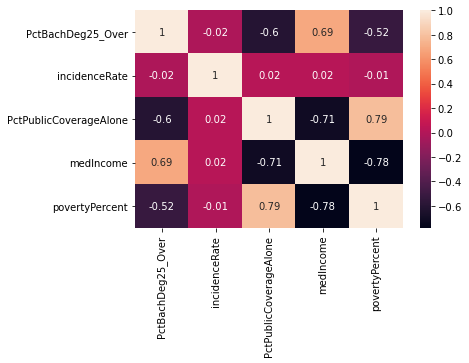

In [71]:
import seaborn as sns
#creating correlation plot with top 5 correlated features with target
corr_plot_df = combined_features[['PctBachDeg25_Over','incidenceRate','PctPublicCoverageAlone','medIncome','povertyPercent']]
matrix = corr_plot_df.corr().round(2)
sns.heatmap(matrix, annot=True)

From the histogram, a number of values for median age were found to be greater than 300. Some values for average household size were found to be equal to 0. These observations were seen as unrealistic. Unrealistic peaks were also found for incidence rate and average annual count. By looking at features in excel it was discovered these peaks were the result of a previous imputation. A count of NaN's and 0's was done for each variable. PctBlack, PctAsian, PctOtherRace, PctBachDeg18_24 and studyPerCap were found to have a significant number of 0's that were not seen as realistic. It is very unlikely any county has 0 for any of these features. StudyPerCap in particular had 1548 counts of 0. PctSomeCol18_24 was found to have 1829 missing values (NaN). Many features were found to have significant amounts of skew particulary to the left. These included avgAnnCount, avgDeathsPerYear, popEst2015, PctBlack, PctAsian, PctOtherRace, PctBachDeg18_24.

A particular high correlation of 0.79 was found between povertyPercent and PctPublicCoverageAlone. Counties with a higher
percentage of people in poverty are unlikely to be able to afford any additional private healthcare other than the healthcare already provided by the government. A high correlation of 0.69 was also found between medIncome between PctBachDeg25_Over. Counties with higher medium income are likely to have more people attaining Bachelor's degrees as these require a substantial financial commitment that people with lower incomes would not be able to afford.  

## ML Pipeline

Created an ML Pipeline that would pre-process the training data. Relevant features were also removed and created. 

In [72]:
from sklearn.base import BaseEstimator, TransformerMixin
#Class controlling the Data cleaning aspect of the ML pipeline
class DataCleaning (BaseEstimator, TransformerMixin):
    
    def __init__(self):
        
        pass
    
    def fit(self, X, y = None):
    
        return self
    
    def transform(self, X, y = None):
        features = X
         #replacing unrealistic observations with NaN's to be replaced by imputation
        features.loc[features['MedianAge'] > 100, 'MedianAge'] = np.nan
        features.loc[features['AvgHouseholdSize'] < 1, 'AvgHouseholdSize'] = np.nan
       
        features.loc[ features['PctBlack'] == 0, 'PctBlack'] = np.nan
        features.loc[ features['PctAsian']  == 0, 'PctAsian'] = np.nan
        features.loc[ features['PctOtherRace']  == 0, 'PctOtherRace'] = np.nan
        features.loc[ features['PctBachDeg18_24']  == 0, 'PctBachDeg18_24'] = np.nan
       
        features.loc[ features['avgAnnCount']  == 1962.667684, 'avgAnnCount'] = np.nan
        features.loc[ features['incidenceRate']  == 453.5494221, 'incidenceRate'] = np.nan
       
        #log transforming features with skew
        features['log_avgAnnCount'] = np.log(features['avgAnnCount'])
        features['log_avgDeathsPerYear'] = np.log(features['avgDeathsPerYear'])
        features['log_popEst2015'] = np.log(features['popEst2015'])
        features['log_PctBlack'] = np.log(features['PctBlack'])                                               
        features['log_PctAsian'] = np.log(features['PctAsian'])
        features['log_PctOtherRace'] = np.log(features['PctOtherRace'])
        features['log_PctBachDeg18_24'] = np.log(features['PctBachDeg18_24'])
        
        #creating new features out of existing features
        
        features['log_AvgDeathsPerCount'] = features['log_avgDeathsPerYear'] / features['log_avgAnnCount']
        features['log_AvgDeathsPerPop']  = features['log_avgDeathsPerYear'] / features['log_popEst2015']
        features['log_PopPerDeaths'] = features['log_popEst2015'] / features['log_avgDeathsPerYear']
        
        features.loc[features['log_AvgDeathsPerCount'] < 0.1, 'avgDeathsPerCount'] = np.nan
        
        #dropping features with poor data or are non log transformed
        features.drop(['avgAnnCount', 'avgDeathsPerYear','popEst2015', 'PctBlack','PctAsian', 'PctOtherRace', 'PctBachDeg18_24', 'studyPerCap', 'PctSomeCol18_24', 'avgDeathsPerCount'], axis=1, inplace=True)
        return features

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#Splits training datasets into training and testing. 75/25 split.
def splitter():
    features = pd.read_csv(training_data_path)
    features_target = pd.read_csv(training_targets_path)
    X_train, X_test, y_train, y_test = train_test_split(features, features_target, test_size = 0.25, random_state = 42)
    return X_train, X_test, y_train, y_test
    

# Data Cleaning, mean imputation, normalisation pipeline applied to training datasets
my_pipeline = Pipeline([
    ('data_cleaning', DataCleaning()),
    ('imputer',SimpleImputer()),
    ('std_scaler', StandardScaler()),
])


X_train, X_test, y_train, y_test = splitter()
#transformations applied to training datasets
X_train_tr = my_pipeline.fit_transform(X_train)
X_test_tr = my_pipeline.fit_transform(X_test)
#testing datasets remain untransformed
y_train_tr = y_train
y_test_tr = y_test


array([[<AxesSubplot:title={'center':'incidenceRate'}>,
        <AxesSubplot:title={'center':'medIncome'}>,
        <AxesSubplot:title={'center':'povertyPercent'}>,
        <AxesSubplot:title={'center':'MedianAge'}>,
        <AxesSubplot:title={'center':'MedianAgeMale'}>,
        <AxesSubplot:title={'center':'MedianAgeFemale'}>],
       [<AxesSubplot:title={'center':'AvgHouseholdSize'}>,
        <AxesSubplot:title={'center':'PercentMarried'}>,
        <AxesSubplot:title={'center':'PctNoHS18_24'}>,
        <AxesSubplot:title={'center':'PctHS18_24'}>,
        <AxesSubplot:title={'center':'PctHS25_Over'}>,
        <AxesSubplot:title={'center':'PctBachDeg25_Over'}>],
       [<AxesSubplot:title={'center':'PctEmployed16_Over'}>,
        <AxesSubplot:title={'center':'PctUnemployed16_Over'}>,
        <AxesSubplot:title={'center':'PctPrivateCoverage'}>,
        <AxesSubplot:title={'center':'PctPrivateCoverageAlone'}>,
        <AxesSubplot:title={'center':'PctEmpPrivCoverage'}>,
        <AxesSub

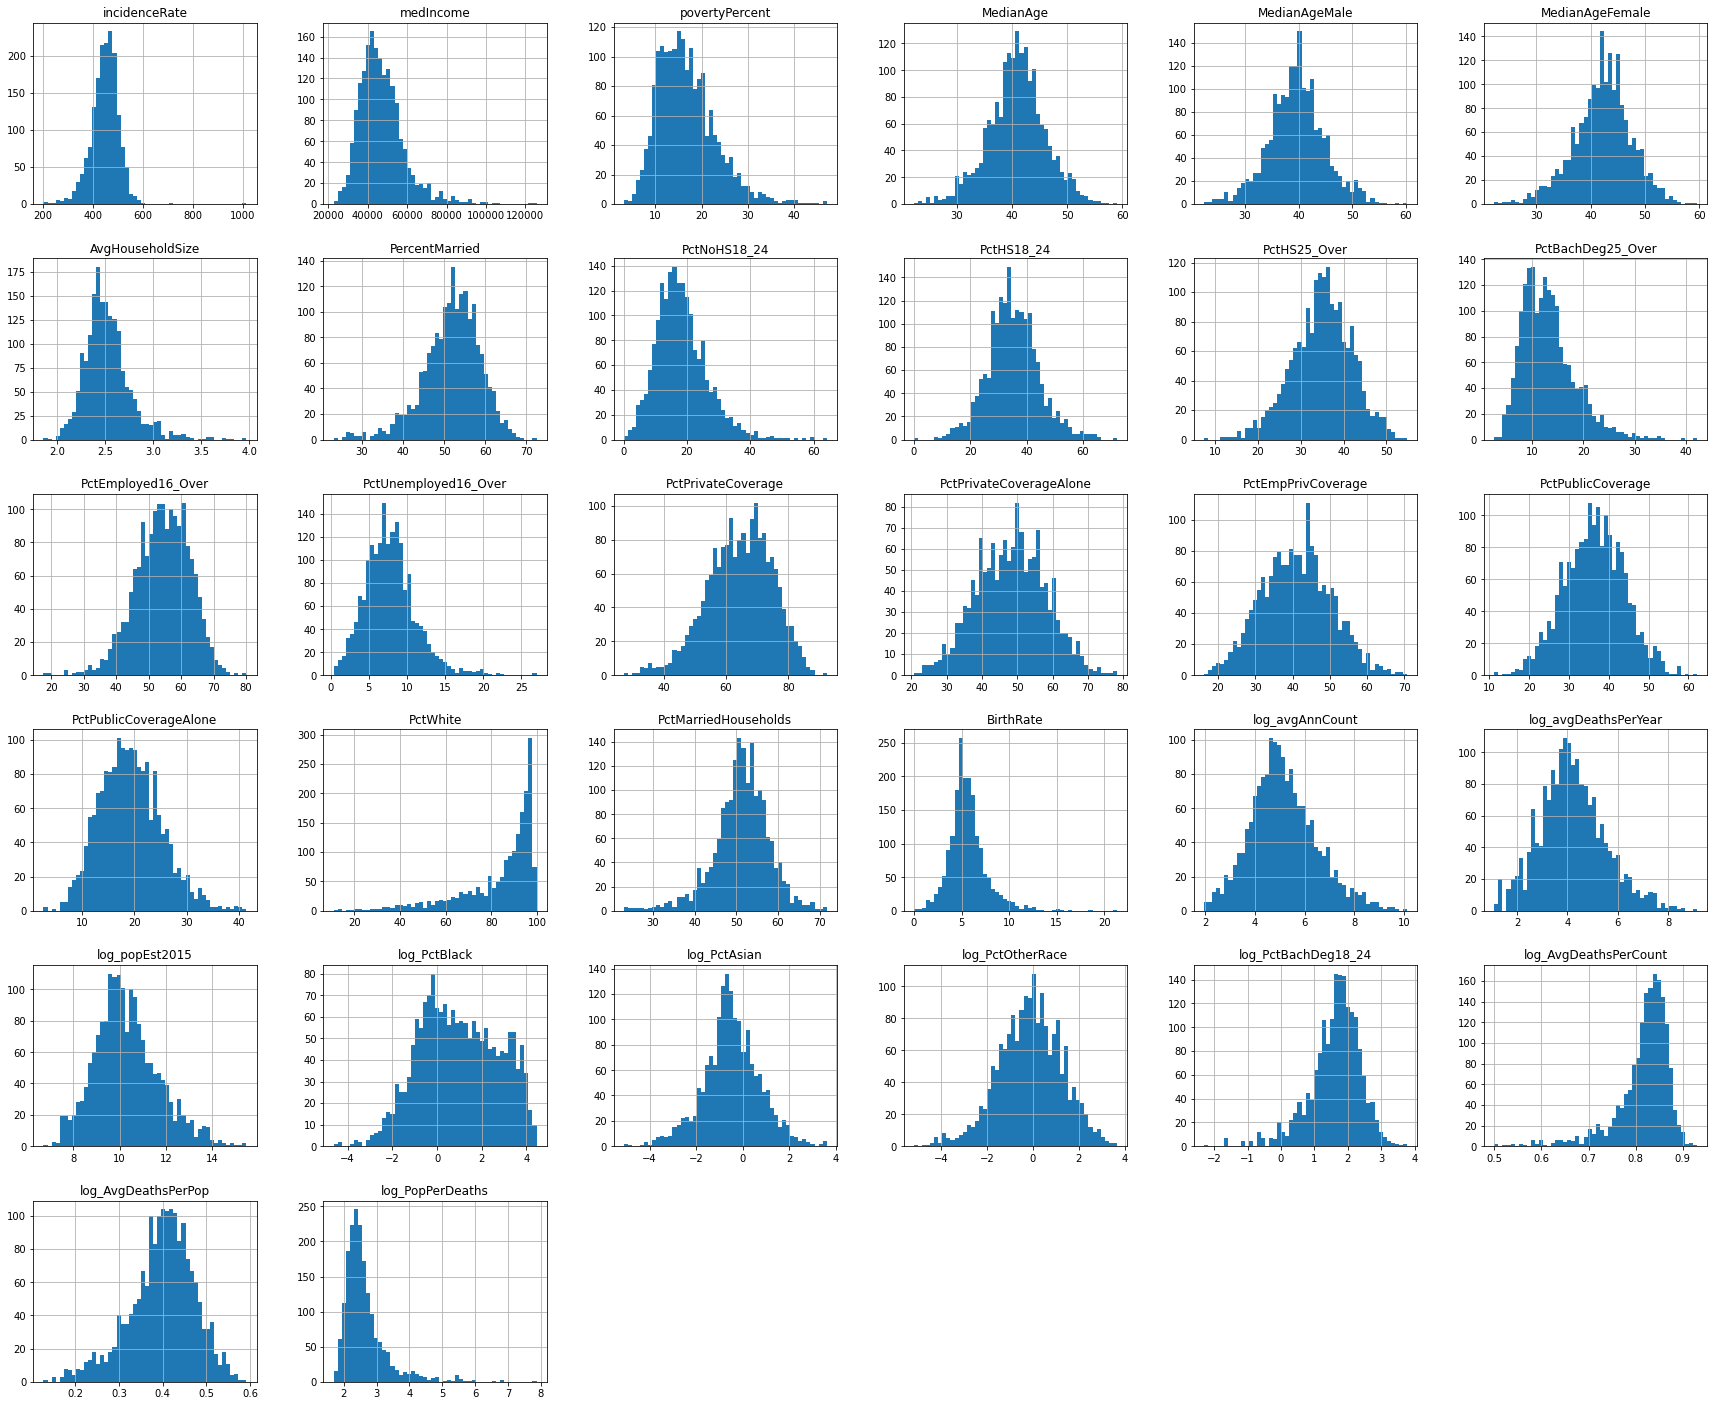

In [74]:
#Recheck distributions of features with histograms after data transformation
X_train.hist(bins=50,figsize=(30,25))

Observations that were identified as unrealistic such as some values of medianAge, AvgHouseholdSize, AvgAnnCount and  incidenceRate were converted to NaN values. Observations found to be 0 for features that seemed unlikely to have 0's (e.g. PctBlack) were also converted to NaN's. StudyPerCap and PctSomeCol18_24 was deleted as they contained a very high percentage of 0 and NaN values. Their was too little data left in these features for meaningful estimates to be made even with imputation.
Feautures with any skew (e.g. avgDeathsPerYear) were log transformed so they better approximated a normal distribution.

Three new features were created. These new features gave more information regarding the target variable improving the predictive accuracy of the model:

- avgDeathsPerCount = log_avgAnnCount/ log_avgDeathsPerYear
- AvgDeathsPerPop = log_AvgDeathsPerYear / log_popEst2015
- PopPerDeaths = log_popEst2015 / log_avgDeathsPerYear

Variables with any skew (e.g. avgDeathsPerYear) were log transformed so they better approximated a normal distribution. Mean Imputation was used to replace every NaN value in the dataset. Every feature was also normalised. 


# Linear Regression Models

An OLS, Lasso and Ridge Linear Regression Model was fitted to the pre-processed training data. 

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

#OLS regression CV
OLS = LinearRegression()
OLS_scores = cross_val_score(OLS, X_test_tr,y_test_tr,scoring="r2",cv=5)
#calculating average r2 score from each of the 5 folds
final_r2_score = sum(OLS_scores)/len(OLS_scores)
final_r2_score

0.7940369591325183

In [76]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
#LASSO regression multiple alpha value and CV
lasso = Lasso(max_iter=10000)
#setting the range and interval of alphas
alphas = np.linspace(0.01,500,100)
coefs = []

#setting the loop that fits each model with every value of alpha
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_tr, y_train)
    coefs.append(lasso.coef_)

model = LassoCV(cv=5)
model.fit(X_train_tr, y_train_tr)
model.alpha_

0.02149595164661446

0.8189239159050101

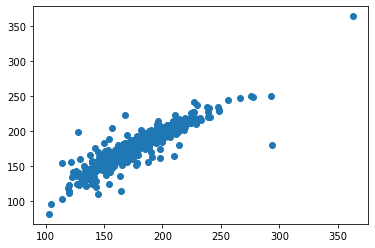

In [77]:
#best lasso model with best value of alpha 
lasso_best = Lasso(alpha=model.alpha_)

lasso_best.fit(X_train_tr, y_train_tr)

pred_lasso = lasso_best.predict(X_test_tr)

plt.scatter(y_test_tr, pred_lasso)

lasso_r2 = r2_score(y_test_tr, pred_lasso)
#final best lasso r2 score
lasso_r2

In [78]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

#ridge regression CV multiple aplhas
ridge = Ridge(max_iter=10000)
coefs = []
alphas = np.linspace(0.01,500,100)

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train_tr, y_train)
    coefs.append(ridge.coef_)
    
model_2 = RidgeCV(cv=5)
model_2.fit(X_train_tr, y_train_tr)
model_2.alpha_

1.0

0.8199416096413153

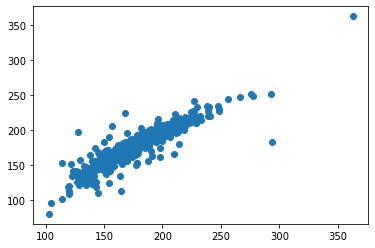

In [79]:
#final ridge scores
ridge_best = Ridge(alpha=model.alpha_)

ridge_best.fit(X_train_tr, y_train_tr)

pred_ridge = ridge_best.predict(X_test_tr)

plt.scatter(y_test_tr, pred_ridge)

ridge_r2 = r2_score(y_test_tr, pred_ridge)

ridge_r2


A range of 100 possible alpha values were chosen from 0.01 to 500 for both ridge and lasso regression. Cross validation was used to find the optimal value of alpha that fitted the model the best. Alpha values of 0.02 and 1 were chosen for Lasso and Ridge. These were then used to build the final model. OLS, Lasso and Ridge models all performed well achieving R squared scores of 0.794, 0.819, 0.820 respectively. As the Ridge model gave a slightly higher R squared score it was chosed as the best performing model. 

# Lasso Model Feature Importance

The top 5 important features were found for the Lasso Model.

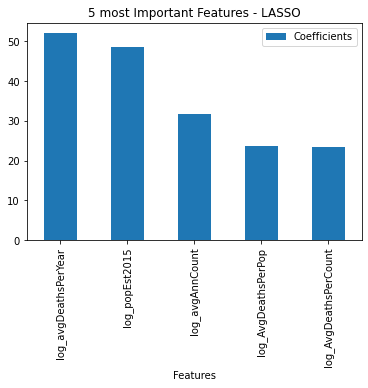

In [80]:
#combining coefficients from best lasso model with feature names from the training dataset
feature_importances = lasso_best.coef_
feature_importances = pd.DataFrame(sorted(zip(feature_importances, X_train),reverse=True))
feature_importances.columns = ['Coefficients', 'Features']
feature_importances['Coefficients'] = feature_importances['Coefficients'].abs()
feature_importances_5 = feature_importances.sort_values(by='Coefficients',ascending=False).head()
feature_importances_5.plot(kind='bar', x = 'Features', title = '5 most Important Features - LASSO');

The 5 most important features from the Lasso model in descending order:
- Average deaths per year
- Population estimate 2015
- average count of cancer cases annualy
- average deaths per person
- average deaths per case of cancer


# Random Forest Model

The random forest model was fitted to the pre-processed training data. The top 5 most important features were found. 

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#grid search: Tries every combination of the parameters seen below
grid  = [{'n_estimators': [3, 10, 30, 50],'max_features':[2, 4, 6, 8, 10, 20, 25]}, 
               {'bootstrap': [False],'n_estimators':[3,10, 30, 50],'max_features':[2,3,4]}]

forest = RandomForestRegressor()

#scores the predictive accuracy of each combination of parameters with -mse.
grid_search = GridSearchCV(forest, grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(X_train_tr, y_train_tr)

#best parameters
grid_search.best_params_
grid_search.best_estimator_

RandomForestRegressor(max_features=25, n_estimators=30)

0.6428532373770606


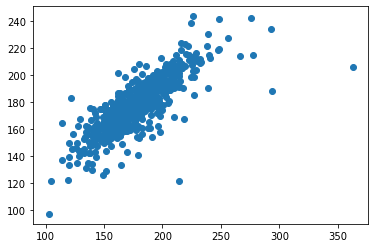

In [82]:
#best forest model
best_forest = RandomForestRegressor(n_estimators =50, max_features=25)
best_forest.fit(X_train_tr, y_train_tr)
forest_pred = best_forest.predict(X_test_tr)
plt.scatter(y_test_tr, forest_pred)

r2_forest = r2_score(y_test_tr, forest_pred)
print(r2_forest)

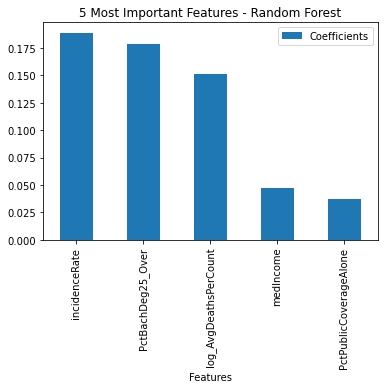

In [83]:
# top 5 random forest features
feature_importances_f = best_forest.feature_importances_
feature_importances_f = pd.DataFrame(sorted(zip(feature_importances_f, X_train),reverse=True))
feature_importances_f.columns = ['Coefficients', 'Features']
feature_importances_f['Coefficients'] = feature_importances_f['Coefficients'].abs()
feature_importances_f5 = feature_importances_f.sort_values(by='Coefficients',ascending=False).head()
feature_importances_f5
feature_importances_f5.plot(kind='bar', x = 'Features', title = '5 Most Important Features - Random Forest');

# Regression vs Random Forest Comparison


Feature and accuracy results between Random Forest and Lasso compared.


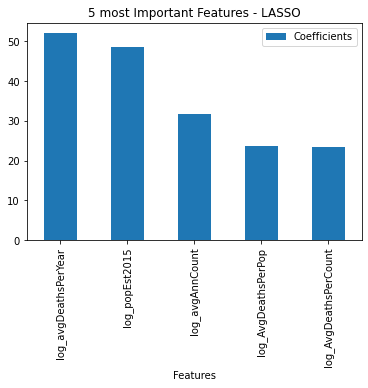

In [84]:
#feature importances for Lasso
feature_importances = lasso_best.coef_
feature_importances = pd.DataFrame(sorted(zip(feature_importances, X_train),reverse=True))
feature_importances.columns = ['Coefficients', 'Features']
feature_importances['Coefficients'] = feature_importances['Coefficients'].abs()
feature_importances_5 = feature_importances.sort_values(by='Coefficients',ascending=False).head()
feature_importances_5.plot(kind='bar', x = 'Features', title = '5 most Important Features - LASSO');

The random forest model gave a r squared value of 0.639. This was significantly  worse than the r squared value of all 3 regression models including the Ridge (best performing) with an r squared value of 0.820. 

The 5 most important features from the Random Forest model in descending order:
- Percent Bachelor Degree holders (25 and over)
- Incidence rate
- Average deaths per case of cancer
- Median income
- Percent high school diploma holders (25 and over)

Both models put avgDeathsPerCount as a top 5 feature for predicting Cancer mortality rates, Lasso as it's 3rd most important and Random Forest as its 5th most important. This new feature is very similar statisitic to the target variable so it makes sense this feature was chosen as very important for predicting it. The models however did vary on the rest of the top 5 features. Lasso found avgDeathsPerYear as the most important feature in predicting cancer mortality rates. Deaths from Cancer and the amount of people who die from cancer per person is likely to highly correlated. Lasso found popEst2015 as the most 2nd important feature. Higher population counties are going to be more densely populated with greater number of people livig in cities. People in cities are more prone to health risks such as air, noise pollution and greater stress. These factors are associated with a greater risk of cancer hence higher cancer mortality rates. 2 out of 3 new features introduced to the model made it into the top 5 lasso features. This implies the new features gave the model a lot more imformation than other features improving its ability to predict cancer mortaility rates.

Random Forest identified PctBachDeg25_Over as the most important features. People with Bachelors degrees are likely to be wealthier due to the high cost of studying at university in the US. People with bachelors degrees are more likely to wealthy when they are older as they are more likely to get a higher paying job. They are better able to afford more expnsive heatcare and can thus afford to spend money on expensive cancer treatments reducing the cancer mortality rate in the county they live in. The same logic applies to median income, Random Forest's 4h most important feature.This agrees to some extent with the EDA performed earlier as this feature had the 4th highest correlation with the target variable.

# Testing the Model

The Ridge regression model was retrained with the training data, then it's accuracy was tested with unseen test data.

In [85]:
## Read in the provided example test data
test_data_path = data_dir + 'Test_data_example.csv' #x test
test_targets_path = data_dir + 'Test_data_example_targets.csv' #y test

#stores the testing data
test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)

#stores the training data 
training_data_path = data_dir + 'Training_data.csv' #x train
training_targets_path = data_dir + 'Training_data_targets.csv' #ytrian

training_data = pd.read_csv(training_data_path)
training_target = pd.read_csv(training_targets_path)

my_pipeline = Pipeline([
    ('data_cleaning', DataCleaning()),
    ('imputer',SimpleImputer()),
    ('std_scaler', StandardScaler()),
])

#pipeline transformation for training data
X_train_fin = my_pipeline.fit_transform(training_data)
X_test_fin = my_pipeline.fit_transform(test_data)

#no transformation for testing data
y_train_fin = training_target
y_test_fin = test_targets

0.8182874149247582

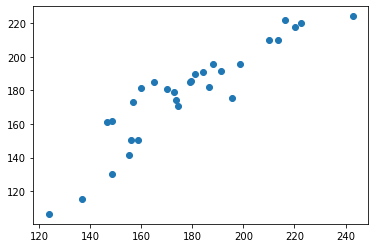

In [86]:
# ridge regression model retrained. alpha value of 1 used determined from previous regression model

ridge_best_fin = Ridge(alpha= 1)

ridge_best_fin.fit(X_train_fin, y_train_fin)

pred_ridge_fin = ridge_best_fin.predict(X_test_fin)

plt.scatter(y_test_fin, pred_ridge_fin)

#final r2 score 

ridge_r2_fin = r2_score(y_test_fin, pred_ridge_fin)
ridge_r2_fin